In [82]:
from collections import defaultdict
import json
import matplotlib.pyplot as plt

In [101]:
with open("./reader_all_metadata_v2.json", "r") as f:
    data = json.load(f)

In [102]:
llms = []
for i, k in enumerate(data.keys()):
    model_call_data = data[k]
    
    models = model_call_data.get('model')
    if models is not None:
        for llm in models:
            llm = llm.replace("'", "").replace('"', '')
            llms.append(llm)
    engines = model_call_data.get('engine')
    if engines is not None:
        for llm in engines:
            llm = llm.replace("'", "").replace('"', '')
            llms.append(llm)

In [103]:
freq = defaultdict(int)
for llm in llms:
    if freq.get(llm) is not None:
        freq[llm] += 1
    else:
        freq[llm] = 1

In [104]:
# get the top 15 in sorted order
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)[:15]}

In [105]:
freq

{'gpt-3.5-turbo': 4792,
 'model': 2638,
 'text-davinci-003': 2287,
 'gpt-4': 1062,
 'text-davinci-002': 1022,
 'gpt-3.5-turbo-16k': 532,
 'self.model': 491,
 'engine': 490,
 'gpt-3.5-turbo-0613': 418,
 'davinci': 371,
 'model_name': 331,
 'gpt-4-1106-preview': 282,
 'claude-2': 266,
 'model_engine': 244,
 'llm_kwargs[llm_model]': 208}

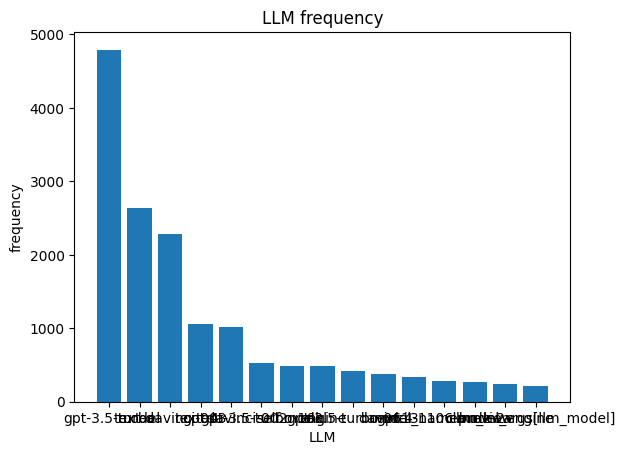

In [106]:
llm_models = freq.keys()
counts = freq.values()

plt.xlabel("LLM")
plt.ylabel("frequency")
plt.title("LLM frequency")
plt.bar(llm_models, counts)
plt.show()

Text(0.5, 1.0, 'Top 15 LLMs by Frequency')

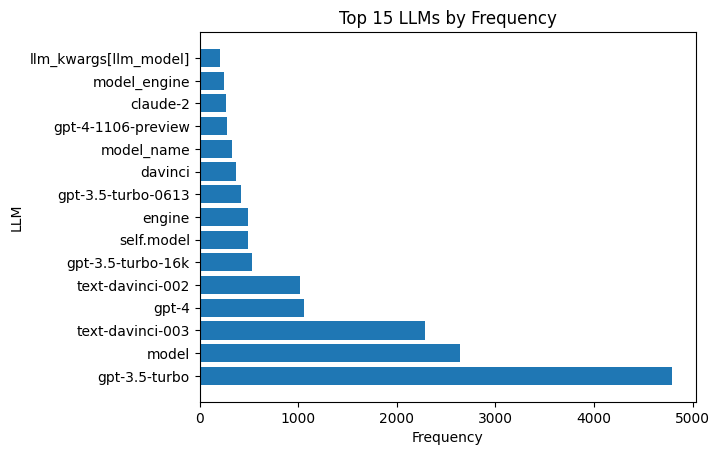

In [107]:
plt.barh(list(llm_models), list(counts))  # Horizontal bar plot
plt.xlabel('Frequency')
plt.ylabel('LLM')
plt.title('Top 15 LLMs by Frequency')